# Recommendation of tariffs

## Project Description
Mobile operator "Megaline" found out: many customers use archive tariffs. They want to build a system capable of analyzing customer behavior and offer users a new tariff: "Smart" or "Ultra".
They have at their disposal data on the behavior of customers who have already switched to these tariffs. We need to build a model for the classification task that selects the appropriate tariff. It is important that the model has good predictive power (minimum proportion of correct answers (accuracy) 0.75).  
**Task:** Create a model to predict which tariff to offer to users.  
**Objectives:** 
Perform job classification.  
Test different models.
Select the best one and test its performance.

## Data Exploration
Let's import all the necessary libraries and verify that the data is indeed pre-processed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [2]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('C:/Users/Ivan/datasetsYP/users_behavior.csv')
        
df.info()
display(df.head(10))
display(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


,count,mean,std,min,25%,50%,75%,max
calls,3214.0,63.038892,33.236368,0.0,40.0000,62.000,82.0000,244.00
minutes,3214.0,438.208787,234.569872,0.0,274.5750,430.600,571.9275,1632.06
messages,3214.0,38.281269,36.148326,0.0,9.0000,30.000,57.0000,224.00
mb_used,3214.0,17207.673836,7570.968246,0.0,12491.9025,16943.235,21424.7000,49745.73
is_ultra,3214.0,0.306472,0.461100,0.0,0.0000,0.000,1.0000,1.00


### Conclusions
Indeed, the data is already pre-processed.
Each object in the dataset is information about one user's behavior in a month. Known:  
- calls - number of calls,  
- minutes - total duration of calls in minutes,  
- messages - number of sms-messages,  
- mb_used - used Internet traffic in Mb,  
- is_ultra - what tariff was used during the month ("Ultra" - 1, "Smart" - 0).  
It turns out that the task is reduced to choosing between two categories (Ultra and Smart).

## Partitioning data into samples

Divide the raw data into training, validation and test samples.
As suggested in the course, let's do it in the format 60% 20% 20%.
Since we have a function to split the data set into two from the course, let's apply it twice.

In [3]:
df_features = df.drop(['is_ultra'], axis=1)
df_targets = df['is_ultra']

df_train_and_valid_features, df_test_features = train_test_split(df_features, test_size=0.20, random_state=44)
df_train_features, df_valid_features =  train_test_split(df_train_and_valid_features, test_size=0.25, random_state=44)

df_train_and_valid_targets, df_test_targets = train_test_split(df_targets, test_size=0.20, random_state=44)
df_train_targets, df_valid_targets =  train_test_split(df_train_and_valid_targets, test_size=0.25, random_state=44)


df_train_features.info()
df_valid_features.info()
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2363 to 2238
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
dtypes: float64(4)
memory usage: 75.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2541 to 3085
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1212 to 428
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minu

Samples are broken down and prepared for modeling.

## Model Exploration
Explore the quality of different models by changing the hyperparameters.
### Logarithmic and Linear Regression
Let's start with the simplest models - logistic and linear regression.

In [4]:
model_log_reg = LogisticRegression(random_state=44, solver='lbfgs', max_iter=1000)
model_log_reg = LinearRegression() 
model_log_reg.fit(df_train_features, df_train_targets)
predictions_valid_log_reg = model_log_reg.predict(df_valid_features)

rsme_log_reg = mean_squared_error(df_valid_targets, predictions_valid_log_reg)**0.5

print('RSME for logarithmic regression:', rsme_log_reg)

model_lin_reg = LinearRegression()
model_lin_reg.fit(df_train_features, df_train_targets)
predictions_valid_lin_reg = model_lin_reg.predict(df_valid_features)

rsme_lin_reg = mean_squared_error(df_valid_targets, predictions_valid_lin_reg)**0.5

print('RSME for linear regression:', rsme_lin_reg)
 
random_predictions = pd.Series(df_valid_targets.mean(), index = df_valid_targets.index)
print('RSME for avarage value:', mean_squared_error(df_valid_targets, random_predictions)**0.5)

RSME for logarithmic regression: 0.46209802462685945
RSME for linear regression: 0.46209802462685945
RSME for avarage value: 0.4706662489774635


In [5]:
object = StandardScaler()

df_train_features_normilized = object.fit_transform(df_train_features)
df_valid_features_normilized = object.fit_transform(df_valid_features)

display(df_train_features_normilized)
display(df_valid_features_normilized)

model_log_reg_second = LogisticRegression(random_state=44, solver='lbfgs', max_iter=1000)
model_log_reg_second = LinearRegression() 
model_log_reg_second.fit(df_train_features_normilized, df_train_targets)
predictions_valid_log_reg_second = model_log_reg_second.predict(df_valid_features_normilized)

rsme_log_reg_second = mean_squared_error(df_valid_targets, predictions_valid_log_reg_second)**0.5

print('RSME for logarithmic regression:', rsme_log_reg)

model_lin_reg_second = LinearRegression()
model_lin_reg_second.fit(df_train_features_normilized, df_train_targets)
predictions_valid_lin_reg_second = model_lin_reg_second.predict(df_valid_features_normilized)

rsme_lin_reg_second = mean_squared_error(df_valid_targets, predictions_valid_lin_reg_second)**0.5

print('RSME for linear regression:', rsme_lin_reg)
 
random_predictions = pd.Series(df_valid_targets.mean(), index = df_valid_targets.index)
print('RSME for avarage value:', mean_squared_error(df_valid_targets, random_predictions)**0.5)

array([[-0.68663683, -0.89528882, -0.02998469, -2.29385336],
       [-0.92741633, -0.83235624, -0.35294823, -0.28048442],
       [-0.2652727 , -0.08160863,  1.23495587, -0.26749032],
       ...,
       [ 0.15609143,  0.11611843, -0.89122081, -1.52385409],
       [-0.59634451, -0.3630749 , -0.21838009,  0.4673337 ],
       [ 0.06579912, -0.02517011, -0.29912097,  0.01375924]])

array([[-1.66336182, -1.65623769, -0.94500873, -1.62249033],
       [ 0.15196698,  0.12283999,  0.11206395,  0.26114976],
       [-0.0984232 , -0.25519457, -0.6220143 ,  0.68456601],
       ...,
       [ 1.59171051,  1.30880291,  2.6960194 ,  1.34476812],
       [ 0.8092412 ,  0.94205561, -0.18156735,  0.47307269],
       [-1.5694655 , -1.53883234,  0.52314777,  1.95831133]])

RSME for logarithmic regression: 0.46209802462685945
RSME for linear regression: 0.46209802462685945
RSME for avarage value: 0.4706662489774635


Logistic and linear regression proved to be practically useless for this task.  
The results are also independent of the prior scaling of the data.

### Decision Tree
Let's look at the results for the decision tree.

In [6]:
best_model_tree = None
best_result_tree = 0
for depth in range(1, 6):
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state = 44)
    model_tree.fit(df_train_features, df_train_targets)
    predictions_valid_tree = model_tree.predict(df_valid_features)
    result = accuracy_score(df_valid_targets, predictions_valid_tree)
    
    if result > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result

    print("Max depth =", depth, ":", end=' ')
    print(result) 

Max depth = 1 : 0.7309486780715396
Max depth = 2 : 0.7589424572317263
Max depth = 3 : 0.7636080870917574
Max depth = 4 : 0.7667185069984448
Max depth = 5 : 0.7636080870917574


The decision tree gives quite good results. The best results are obtained at a depth of 4, which coincides with the number of available parameters, probably further retraining takes place.

### Random Forest
Consider how the hyperparameters of the random forest affect the predictive power.


In [7]:
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0
for est in range(10, 51, 10):
    print('Number of trees:', est)
    for depth in range (1, 6):
        model = RandomForestClassifier(random_state = 44,n_estimators=est, max_depth=depth)
        model.fit(df_train_features, df_train_targets)
        predictions_valid_forest = model.predict(df_valid_features) 
        result = accuracy_score(df_valid_targets, predictions_valid_forest)
        
        if result > best_result_forest:
            best_model_forest = model
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth
            
        print("Max depth =", depth, ":", end=' ')
        print(result)
        
    print('\n')

print('Best results:', best_result_forest)

Number of trees: 10
Max depth = 1 : 0.7371695178849145
Max depth = 2 : 0.76049766718507
Max depth = 3 : 0.7667185069984448
Max depth = 4 : 0.7729393468118196
Max depth = 5 : 0.7729393468118196


Number of trees: 20
Max depth = 1 : 0.7325038880248833
Max depth = 2 : 0.76049766718507
Max depth = 3 : 0.7682737169517885
Max depth = 4 : 0.7698289269051322
Max depth = 5 : 0.7713841368584758


Number of trees: 30
Max depth = 1 : 0.7325038880248833
Max depth = 2 : 0.7667185069984448
Max depth = 3 : 0.7682737169517885
Max depth = 4 : 0.7682737169517885
Max depth = 5 : 0.7698289269051322


Number of trees: 40
Max depth = 1 : 0.7402799377916018
Max depth = 2 : 0.7682737169517885
Max depth = 3 : 0.7682737169517885
Max depth = 4 : 0.7713841368584758
Max depth = 5 : 0.7698289269051322


Number of trees: 50
Max depth = 1 : 0.7371695178849145
Max depth = 2 : 0.7651632970451011
Max depth = 3 : 0.7682737169517885
Max depth = 4 : 0.7698289269051322
Max depth = 5 : 0.7698289269051322


Best results: 0.772

Interestingly, the number of trees has almost no effect on the prediction accuracy for the considered parameters. The depth corresponds to the number of parameters is also optimal.

f1_score: 0.7470484840886235
AUC-ROC: 0.6797849110164864


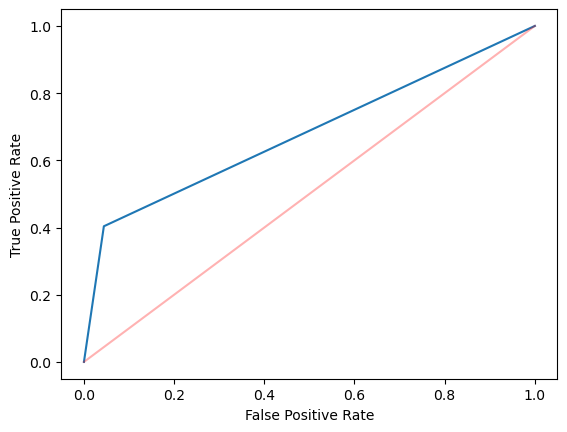

In [8]:
f1_score_metrics = f1_score(df_valid_targets, best_model_forest.predict(df_valid_features), average='weighted')
print('f1_score:', f1_score_metrics)

roc_auc_metrics = roc_auc_score(df_valid_targets, best_model_forest.predict(df_valid_features))
print('AUC-ROC:', roc_auc_metrics)



fpr, tpr, _ = metrics. roc_curve (df_valid_targets, best_model_forest.predict(df_valid_features))

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],  color='r', alpha=0.3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

### Conclusions
Linear and logistic regression proved useless for this problem.  
The decision tree showed quite good results at a depth matching the number of parameters, while the forest of trees gave a slightly more accurate prediction.  
A forest of 10 trees with a maximum depth of 4 was chosen as the best model.

## Let's check the model on a test sample
The best model turned out to be a tree forest model with 10 trees and a maximum depth of 4.

In [9]:
predictions_test_best = best_model_forest.predict(df_test_features) 
result_best_on_test = accuracy_score(df_test_targets, predictions_test_best)
print(result_best_on_test)

0.8009331259720062


On the test sample, the model performed well, the accuracy of 0.8 is better than the value required by the condition (0.75).

## Check the models for adequacy

Since the accuracy of the model is quite high (0.8 on the test sample - it definitely performs better than random, which has an accuracy of 0 on a large sample).  
To check for adequacy, I think it is interesting to see what results do not match. Maybe, on the basis of this information it will be possible to understand if there is any trend in model errors.

In [10]:
df_test_merged = df_test_features.reset_index().merge(df_test_targets.reset_index(),
                                                      left_index=True, right_index=True, how='left')
for i in range(len(df_test_targets)):
    if predictions_test_best[i] != df_test_merged['is_ultra'][i]:
        display(df_test_merged.iloc[i])
       


index_x      3170.00
calls          72.00
minutes       447.40
messages      105.00
mb_used     27873.88
index_y      3170.00
is_ultra        0.00
Name: 7, dtype: float64

index_x       232.00
calls          42.00
minutes       260.94
messages       79.00
mb_used     17519.93
index_y       232.00
is_ultra        1.00
Name: 18, dtype: float64

index_x     2628.00
calls         89.00
minutes      635.86
messages       0.00
mb_used     8417.03
index_y     2628.00
is_ultra       1.00
Name: 30, dtype: float64

index_x     2767.00
calls         27.00
minutes      148.89
messages      45.00
mb_used     6976.25
index_y     2767.00
is_ultra       1.00
Name: 31, dtype: float64

index_x      1417.00
calls          71.00
minutes       501.59
messages       40.00
mb_used     17828.40
index_y      1417.00
is_ultra        1.00
Name: 33, dtype: float64

index_x     698.00
calls        16.00
minutes     105.46
messages      3.00
mb_used       0.01
index_y     698.00
is_ultra      1.00
Name: 34, dtype: float64

index_x     2411.00
calls         73.00
minutes      453.90
messages      57.00
mb_used     4719.69
index_y     2411.00
is_ultra       1.00
Name: 43, dtype: float64

index_x       493.00
calls          31.00
minutes       210.44
messages       19.00
mb_used     27437.43
index_y       493.00
is_ultra        0.00
Name: 49, dtype: float64

index_x      3167.00
calls          87.00
minutes       580.77
messages       28.00
mb_used     21995.82
index_y      3167.00
is_ultra        1.00
Name: 57, dtype: float64

index_x      1948.00
calls          99.00
minutes       742.19
messages       35.00
mb_used     17626.73
index_y      1948.00
is_ultra        1.00
Name: 70, dtype: float64

index_x     2109.00
calls         67.00
minutes      431.79
messages       5.00
mb_used     6287.89
index_y     2109.00
is_ultra       1.00
Name: 77, dtype: float64

index_x       457.00
calls          99.00
minutes       642.81
messages       45.00
mb_used     10187.06
index_y       457.00
is_ultra        1.00
Name: 78, dtype: float64

index_x      2862.00
calls          74.00
minutes       589.16
messages       49.00
mb_used     17279.27
index_y      2862.00
is_ultra        1.00
Name: 84, dtype: float64

index_x      2531.00
calls         124.00
minutes       786.97
messages       73.00
mb_used     27387.22
index_y      2531.00
is_ultra        0.00
Name: 86, dtype: float64

index_x      1431.00
calls          43.00
minutes       314.37
messages       43.00
mb_used     10015.52
index_y      1431.00
is_ultra        1.00
Name: 87, dtype: float64

index_x      2129.00
calls          59.00
minutes       398.07
messages       24.00
mb_used     22574.39
index_y      2129.00
is_ultra        1.00
Name: 89, dtype: float64

index_x      2445.0
calls         114.0
minutes       859.4
messages       44.0
mb_used     14445.3
index_y      2445.0
is_ultra        0.0
Name: 95, dtype: float64

index_x      2999.00
calls          74.00
minutes       508.53
messages       27.00
mb_used     13752.20
index_y      2999.00
is_ultra        1.00
Name: 96, dtype: float64

index_x      1755.00
calls           0.00
minutes         0.00
messages       48.00
mb_used     12442.93
index_y      1755.00
is_ultra        0.00
Name: 98, dtype: float64

index_x        43.00
calls          50.00
minutes       323.99
messages       10.00
mb_used     20922.05
index_y        43.00
is_ultra        1.00
Name: 99, dtype: float64

index_x     2914.00
calls         57.00
minutes      428.23
messages       5.00
mb_used     8857.38
index_y     2914.00
is_ultra       1.00
Name: 103, dtype: float64

index_x      1363.00
calls          49.00
minutes       354.93
messages       79.00
mb_used     12249.89
index_y      1363.00
is_ultra        1.00
Name: 104, dtype: float64

index_x      2388.00
calls           3.00
minutes        35.47
messages       62.00
mb_used     11774.26
index_y      2388.00
is_ultra        1.00
Name: 107, dtype: float64

index_x       797.00
calls          82.00
minutes       552.28
messages       50.00
mb_used     24278.94
index_y       797.00
is_ultra        1.00
Name: 108, dtype: float64

index_x      1311.00
calls          79.00
minutes       517.95
messages        1.00
mb_used     26517.44
index_y      1311.00
is_ultra        1.00
Name: 111, dtype: float64

index_x      2554.00
calls          29.00
minutes       232.85
messages       85.00
mb_used     26395.12
index_y      2554.00
is_ultra        0.00
Name: 112, dtype: float64

index_x      1991.00
calls          77.00
minutes       573.41
messages       45.00
mb_used     28489.81
index_y      1991.00
is_ultra        0.00
Name: 116, dtype: float64

index_x       280.00
calls          68.00
minutes       413.20
messages       29.00
mb_used     13526.61
index_y       280.00
is_ultra        1.00
Name: 117, dtype: float64

index_x     1371.00
calls         85.00
minutes      561.13
messages      84.00
mb_used     9406.05
index_y     1371.00
is_ultra       1.00
Name: 123, dtype: float64

index_x       846.00
calls         114.00
minutes       734.12
messages      134.00
mb_used     25969.80
index_y       846.00
is_ultra        0.00
Name: 129, dtype: float64

index_x     2030.00
calls         52.00
minutes      396.63
messages       4.00
mb_used     7166.28
index_y     2030.00
is_ultra       1.00
Name: 133, dtype: float64

index_x      1436.00
calls         121.00
minutes       843.72
messages        0.00
mb_used     14976.00
index_y      1436.00
is_ultra        0.00
Name: 141, dtype: float64

index_x     3091.00
calls         17.00
minutes       91.03
messages      13.00
mb_used     2614.07
index_y     3091.00
is_ultra       1.00
Name: 144, dtype: float64

index_x      1817.00
calls          36.00
minutes       297.35
messages       20.00
mb_used     24526.88
index_y      1817.00
is_ultra        1.00
Name: 149, dtype: float64

index_x       221.00
calls          98.00
minutes       729.83
messages      105.00
mb_used     18675.65
index_y       221.00
is_ultra        1.00
Name: 153, dtype: float64

index_x       341.00
calls         108.00
minutes       728.68
messages        4.00
mb_used     14340.84
index_y       341.00
is_ultra        1.00
Name: 155, dtype: float64

index_x      1767.00
calls          50.00
minutes       375.76
messages       78.00
mb_used     12666.67
index_y      1767.00
is_ultra        1.00
Name: 157, dtype: float64

index_x      2752.00
calls          63.00
minutes       478.92
messages       54.00
mb_used     23681.93
index_y      2752.00
is_ultra        1.00
Name: 158, dtype: float64

index_x       580.00
calls          43.00
minutes       321.63
messages       42.00
mb_used     25599.87
index_y       580.00
is_ultra        1.00
Name: 164, dtype: float64

index_x     2028.00
calls         80.00
minutes      489.48
messages       0.00
mb_used     9126.45
index_y     2028.00
is_ultra       1.00
Name: 174, dtype: float64

index_x     1065.00
calls          2.00
minutes        2.00
messages       0.00
mb_used      959.51
index_y     1065.00
is_ultra       1.00
Name: 178, dtype: float64

index_x       588.00
calls          81.00
minutes       565.64
messages       40.00
mb_used     15323.58
index_y       588.00
is_ultra        1.00
Name: 182, dtype: float64

index_x      2146.00
calls         106.00
minutes       806.68
messages       72.00
mb_used     12970.66
index_y      2146.00
is_ultra        0.00
Name: 189, dtype: float64

index_x      2249.00
calls          46.00
minutes       314.16
messages       48.00
mb_used     16684.31
index_y      2249.00
is_ultra        1.00
Name: 196, dtype: float64

index_x      2927.00
calls          95.00
minutes       721.24
messages       36.00
mb_used     23219.86
index_y      2927.00
is_ultra        1.00
Name: 197, dtype: float64

index_x      459.00
calls          4.00
minutes       27.05
messages      39.00
mb_used     7382.23
index_y      459.00
is_ultra       1.00
Name: 199, dtype: float64

index_x      3097.00
calls          46.00
minutes       372.18
messages        0.00
mb_used     27304.11
index_y      3097.00
is_ultra        0.00
Name: 201, dtype: float64

index_x       802.00
calls          90.00
minutes       521.53
messages       54.00
mb_used     15950.10
index_y       802.00
is_ultra        1.00
Name: 202, dtype: float64

index_x      1736.00
calls          42.00
minutes       281.39
messages        0.00
mb_used     21421.28
index_y      1736.00
is_ultra        1.00
Name: 203, dtype: float64

index_x      1204.00
calls          78.00
minutes       563.86
messages        0.00
mb_used     17061.33
index_y      1204.00
is_ultra        1.00
Name: 207, dtype: float64

index_x      1671.00
calls         115.00
minutes       758.98
messages       49.00
mb_used     14474.71
index_y      1671.00
is_ultra        1.00
Name: 208, dtype: float64

index_x     2369.00
calls         62.00
minutes      436.40
messages      89.00
mb_used     8495.06
index_y     2369.00
is_ultra       1.00
Name: 211, dtype: float64

index_x      1001.00
calls          88.00
minutes       740.68
messages        0.00
mb_used     25803.71
index_y      1001.00
is_ultra        1.00
Name: 218, dtype: float64

index_x       773.00
calls          94.00
minutes       707.37
messages       19.00
mb_used     14491.72
index_y       773.00
is_ultra        1.00
Name: 224, dtype: float64

index_x      1350.00
calls          82.00
minutes       564.01
messages        0.00
mb_used     13846.03
index_y      1350.00
is_ultra        1.00
Name: 229, dtype: float64

index_x     2020.00
calls         81.00
minutes      506.46
messages      21.00
mb_used     7510.09
index_y     2020.00
is_ultra       1.00
Name: 240, dtype: float64

index_x       223.00
calls         110.00
minutes       881.06
messages       72.00
mb_used     11441.18
index_y       223.00
is_ultra        0.00
Name: 241, dtype: float64

index_x      2636.00
calls          75.00
minutes       530.55
messages      143.00
mb_used     21653.39
index_y      2636.00
is_ultra        0.00
Name: 246, dtype: float64

index_x     1368.00
calls         21.00
minutes      135.88
messages      18.00
mb_used     9561.56
index_y     1368.00
is_ultra       1.00
Name: 259, dtype: float64

index_x      2218.00
calls          66.00
minutes       516.49
messages       98.00
mb_used     26830.49
index_y      2218.00
is_ultra        1.00
Name: 262, dtype: float64

index_x      1600.00
calls          85.00
minutes       601.18
messages       55.00
mb_used     16089.05
index_y      1600.00
is_ultra        1.00
Name: 268, dtype: float64

index_x       532.00
calls          75.00
minutes       496.06
messages       14.00
mb_used     13850.84
index_y       532.00
is_ultra        1.00
Name: 269, dtype: float64

index_x      2332.00
calls          65.00
minutes       401.06
messages       49.00
mb_used     19660.40
index_y      2332.00
is_ultra        1.00
Name: 270, dtype: float64

index_x     1150.00
calls         53.00
minutes      340.14
messages      65.00
mb_used     9465.94
index_y     1150.00
is_ultra       1.00
Name: 285, dtype: float64

index_x       202.00
calls          92.00
minutes       632.45
messages       22.00
mb_used     20221.48
index_y       202.00
is_ultra        1.00
Name: 288, dtype: float64

index_x      1514.00
calls          30.00
minutes       204.33
messages       10.00
mb_used     30084.73
index_y      1514.00
is_ultra        0.00
Name: 295, dtype: float64

index_x      1032.00
calls          65.00
minutes       447.07
messages       55.00
mb_used     24515.37
index_y      1032.00
is_ultra        1.00
Name: 296, dtype: float64

index_x      517.00
calls         36.00
minutes      229.49
messages       0.00
mb_used     5579.28
index_y      517.00
is_ultra       1.00
Name: 305, dtype: float64

index_x      2603.00
calls          55.00
minutes       402.17
messages        0.00
mb_used     22021.11
index_y      2603.00
is_ultra        1.00
Name: 310, dtype: float64

index_x      1857.00
calls          62.00
minutes       352.66
messages       82.00
mb_used     28205.37
index_y      1857.00
is_ultra        0.00
Name: 315, dtype: float64

index_x      2943.00
calls           0.00
minutes         0.00
messages       17.00
mb_used     12905.41
index_y      2943.00
is_ultra        1.00
Name: 317, dtype: float64

index_x      1220.00
calls          22.00
minutes       142.56
messages       61.00
mb_used     18891.63
index_y      1220.00
is_ultra        1.00
Name: 323, dtype: float64

index_x       509.00
calls          69.00
minutes       460.06
messages        0.00
mb_used     27802.78
index_y       509.00
is_ultra        0.00
Name: 332, dtype: float64

index_x      955.00
calls         85.00
minutes      613.98
messages      34.00
mb_used     5622.08
index_y      955.00
is_ultra       1.00
Name: 335, dtype: float64

index_x      2232.00
calls          93.00
minutes       730.44
messages        0.00
mb_used     20294.90
index_y      2232.00
is_ultra        1.00
Name: 344, dtype: float64

index_x      1138.00
calls         109.00
minutes       833.51
messages       69.00
mb_used     18408.84
index_y      1138.00
is_ultra        0.00
Name: 351, dtype: float64

index_x      2476.00
calls          46.00
minutes       300.17
messages      100.00
mb_used     13432.78
index_y      2476.00
is_ultra        1.00
Name: 354, dtype: float64

index_x     1673.00
calls        100.00
minutes      769.45
messages       0.00
mb_used     7718.19
index_y     1673.00
is_ultra       1.00
Name: 358, dtype: float64

index_x      2280.00
calls         108.00
minutes       747.39
messages       96.00
mb_used     36266.22
index_y      2280.00
is_ultra        0.00
Name: 359, dtype: float64

index_x      1663.00
calls          42.00
minutes       275.75
messages       46.00
mb_used     11000.61
index_y      1663.00
is_ultra        1.00
Name: 364, dtype: float64

index_x      1902.00
calls          33.00
minutes       227.67
messages        0.00
mb_used     23528.08
index_y      1902.00
is_ultra        1.00
Name: 366, dtype: float64

index_x      2255.00
calls         125.00
minutes       835.29
messages       26.00
mb_used     23116.04
index_y      2255.00
is_ultra        0.00
Name: 375, dtype: float64

index_x       926.00
calls          92.00
minutes       757.19
messages        0.00
mb_used     14682.17
index_y       926.00
is_ultra        1.00
Name: 378, dtype: float64

index_x      2968.00
calls          80.00
minutes       581.24
messages       60.00
mb_used     20897.77
index_y      2968.00
is_ultra        1.00
Name: 379, dtype: float64

index_x      1927.00
calls          82.00
minutes       643.82
messages       28.00
mb_used     26403.93
index_y      1927.00
is_ultra        1.00
Name: 396, dtype: float64

index_x       243.00
calls         121.00
minutes       765.61
messages       53.00
mb_used     21445.05
index_y       243.00
is_ultra        1.00
Name: 401, dtype: float64

index_x       603.00
calls          70.00
minutes       509.42
messages       90.00
mb_used     15614.34
index_y       603.00
is_ultra        1.00
Name: 404, dtype: float64

index_x       262.00
calls          52.00
minutes       365.85
messages       91.00
mb_used     16879.69
index_y       262.00
is_ultra        1.00
Name: 405, dtype: float64

index_x      417.00
calls         74.00
minutes      539.51
messages      27.00
mb_used     7732.23
index_y      417.00
is_ultra       1.00
Name: 407, dtype: float64

index_x      3127.00
calls          89.00
minutes       548.43
messages        6.00
mb_used     25307.07
index_y      3127.00
is_ultra        1.00
Name: 408, dtype: float64

index_x     2997.00
calls         46.00
minutes      320.98
messages      70.00
mb_used     9817.63
index_y     2997.00
is_ultra       1.00
Name: 413, dtype: float64

index_x      1477.00
calls          98.00
minutes       703.16
messages        4.00
mb_used     25391.67
index_y      1477.00
is_ultra        1.00
Name: 419, dtype: float64

index_x       422.00
calls         120.00
minutes       694.90
messages        0.00
mb_used     21547.26
index_y       422.00
is_ultra        1.00
Name: 422, dtype: float64

index_x     1728.00
calls         43.00
minutes      266.10
messages      22.00
mb_used     6676.01
index_y     1728.00
is_ultra       1.00
Name: 425, dtype: float64

index_x       994.00
calls          68.00
minutes       379.06
messages       18.00
mb_used     11166.22
index_y       994.00
is_ultra        1.00
Name: 432, dtype: float64

index_x      1627.00
calls          42.00
minutes       289.91
messages       57.00
mb_used     26951.22
index_y      1627.00
is_ultra        1.00
Name: 445, dtype: float64

index_x      1531.00
calls         100.00
minutes       730.05
messages       20.00
mb_used     26582.03
index_y      1531.00
is_ultra        1.00
Name: 463, dtype: float64

index_x       630.00
calls          44.00
minutes       271.16
messages        0.00
mb_used     12749.16
index_y       630.00
is_ultra        1.00
Name: 468, dtype: float64

index_x       343.00
calls          78.00
minutes       477.07
messages        0.00
mb_used     17862.30
index_y       343.00
is_ultra        1.00
Name: 482, dtype: float64

index_x     2611.00
calls         45.00
minutes      297.11
messages       3.00
mb_used     8964.46
index_y     2611.00
is_ultra       1.00
Name: 485, dtype: float64

index_x       914.00
calls         137.00
minutes       973.64
messages       13.00
mb_used     16015.97
index_y       914.00
is_ultra        0.00
Name: 505, dtype: float64

index_x      2365.00
calls           2.00
minutes        12.43
messages       48.00
mb_used     29724.22
index_y      2365.00
is_ultra        0.00
Name: 514, dtype: float64

index_x     2303.00
calls         43.00
minutes      345.70
messages      58.00
mb_used     1981.69
index_y     2303.00
is_ultra       1.00
Name: 516, dtype: float64

index_x     1523.00
calls         75.00
minutes      533.35
messages      74.00
mb_used     7289.94
index_y     1523.00
is_ultra       1.00
Name: 522, dtype: float64

index_x     1192.00
calls         15.00
minutes      129.64
messages       0.00
mb_used     5208.12
index_y     1192.00
is_ultra       1.00
Name: 524, dtype: float64

index_x      3164.00
calls         113.00
minutes       771.95
messages       14.00
mb_used     15571.17
index_y      3164.00
is_ultra        1.00
Name: 530, dtype: float64

index_x      2087.00
calls          84.00
minutes       537.57
messages       49.00
mb_used     28381.19
index_y      2087.00
is_ultra        0.00
Name: 531, dtype: float64

index_x      2572.00
calls          32.00
minutes       188.41
messages       78.00
mb_used     25113.59
index_y      2572.00
is_ultra        1.00
Name: 536, dtype: float64

index_x      1997.00
calls         109.00
minutes       845.72
messages        0.00
mb_used     13893.98
index_y      1997.00
is_ultra        0.00
Name: 549, dtype: float64

index_x      2694.00
calls          77.00
minutes       549.07
messages        0.00
mb_used     23388.63
index_y      2694.00
is_ultra        1.00
Name: 550, dtype: float64

index_x      2291.00
calls           0.00
minutes         0.00
messages       28.00
mb_used     11864.26
index_y      2291.00
is_ultra        1.00
Name: 554, dtype: float64

index_x     2209.00
calls         15.00
minutes       84.66
messages      13.00
mb_used     4353.73
index_y     2209.00
is_ultra       1.00
Name: 555, dtype: float64

index_x     3066.00
calls         44.00
minutes      250.07
messages      37.00
mb_used        0.00
index_y     3066.00
is_ultra       1.00
Name: 558, dtype: float64

index_x      1469.00
calls         115.00
minutes       747.58
messages       98.00
mb_used     12912.97
index_y      1469.00
is_ultra        1.00
Name: 559, dtype: float64

index_x       299.00
calls          43.00
minutes       235.81
messages       43.00
mb_used     23859.26
index_y       299.00
is_ultra        1.00
Name: 567, dtype: float64

index_x       451.00
calls          90.00
minutes       646.31
messages       51.00
mb_used     22061.76
index_y       451.00
is_ultra        1.00
Name: 572, dtype: float64

index_x      1730.00
calls          57.00
minutes       334.24
messages       94.00
mb_used     19656.30
index_y      1730.00
is_ultra        1.00
Name: 578, dtype: float64

index_x       486.00
calls         107.00
minutes       653.70
messages       94.00
mb_used     15584.23
index_y       486.00
is_ultra        1.00
Name: 584, dtype: float64

index_x     2050.00
calls         98.00
minutes      749.54
messages       0.00
mb_used     8633.32
index_y     2050.00
is_ultra       1.00
Name: 593, dtype: float64

index_x       640.00
calls          47.00
minutes       340.18
messages       86.00
mb_used     13022.89
index_y       640.00
is_ultra        1.00
Name: 598, dtype: float64

index_x      2348.00
calls         141.00
minutes      1102.88
messages       50.00
mb_used     16951.74
index_y      2348.00
is_ultra        0.00
Name: 602, dtype: float64

index_x       769.00
calls           0.00
minutes         0.00
messages       32.00
mb_used     17206.44
index_y       769.00
is_ultra        0.00
Name: 608, dtype: float64

index_x      2383.00
calls          44.00
minutes       370.76
messages        0.00
mb_used     24751.52
index_y      2383.00
is_ultra        1.00
Name: 610, dtype: float64

index_x      2272.00
calls          93.00
minutes       658.89
messages       38.00
mb_used     17655.47
index_y      2272.00
is_ultra        1.00
Name: 611, dtype: float64

index_x      2041.00
calls          73.00
minutes       442.40
messages        0.00
mb_used     21436.39
index_y      2041.00
is_ultra        1.00
Name: 626, dtype: float64

index_x       155.00
calls         100.00
minutes       657.35
messages        0.00
mb_used     23039.76
index_y       155.00
is_ultra        1.00
Name: 627, dtype: float64

index_x      1739.00
calls          40.00
minutes       307.83
messages        0.00
mb_used     17130.74
index_y      1739.00
is_ultra        1.00
Name: 636, dtype: float64

index_x      1669.00
calls           0.00
minutes         0.00
messages       19.00
mb_used     17289.88
index_y      1669.00
is_ultra        1.00
Name: 638, dtype: float64

The model is wrong in both ways, it is important.
No particular trend was observed either.
Probably, the model errors are related to the fact that in real life people periodically switch to suboptimal tariffs, or change the style of using mobile communication, but not the tariff.

## Conclusions
The original dataset was validated against the description (finished pre-processed data).  
It was divided into three samples in the ratio 60% 20% 20%: training, validation and test.  
Four types of models were validated, it turned out that:  
Linear and logistic regression are not suitable for this problem.  
Decision tree gives a good predictive power, and the optimal depth is the number of parameters known for training (4).
The forest of trees (with the number of trees 10, and optimal depth from one tree) allowed to improve the results slightly.
The optimal tree forest model performed well on the test dataset, exceeding the required value for prediction accuracy.
A semi-empirical study of the model's errors showed that it erred both one way and the other, with no clear trend in errors.